## NNUnet Implementation

### Download Data

In [10]:
import os

# Define the file path and extracted directory path
file_path = 'images.zip'
extracted_path = 'lgg-mri-segmentation/kaggle_3m'

# Check if the file already exists
if not os.path.exists(file_path):
    # Download the file if it doesn't exist
    !wget --no-check-certificate 'https://drive.usercontent.google.com/download?id=1cfORNOh_p1KHbhw8U0zhGkjSC2IrGaTB&export=download&confirm=t&uuid=c5760839-02fd-436b-9e38-9635cd7d8aab&at=APZUnTVLTsvNxsW4SInOAOYrK9ZA%3A1715907782351' -O images.zip
else:
    print("File already exists. No need to download again.")

# Check if the directory already exists
if not os.path.exists(extracted_path):
    # Unzip the file if the directory doesn't exist
    !unzip -n images.zip -d lgg-mri-segmentation
    print("Unzip operation completed.")
else:
    print("Files are already extracted. No need to unzip again.")

# IMAGE_PATH variable
IMAGE_PATH = 'lgg-mri-segmentation/kaggle_3m'

# Your existing code for listing the paths
paths = []
for dirname in os.listdir(IMAGE_PATH):
    if os.path.isdir(os.path.join(IMAGE_PATH, dirname)):
        for filename in os.listdir(os.path.join(IMAGE_PATH, dirname)):
            # Only the files with ',tif' format should be added to the 'paths' list
            if filename.endswith('.tif'):
                paths.append(IMAGE_PATH+'/'+dirname+'/'+filename)

len(paths), paths[:20:5]


File already exists. No need to download again.
Files are already extracted. No need to unzip again.


(7858,
 ['lgg-mri-segmentation/kaggle_3m/TCGA_HT_7692_19960724/TCGA_HT_7692_19960724_11_mask.tif',
  'lgg-mri-segmentation/kaggle_3m/TCGA_HT_7692_19960724/TCGA_HT_7692_19960724_16.tif',
  'lgg-mri-segmentation/kaggle_3m/TCGA_HT_7692_19960724/TCGA_HT_7692_19960724_14.tif',
  'lgg-mri-segmentation/kaggle_3m/TCGA_HT_7692_19960724/TCGA_HT_7692_19960724_10_mask.tif'])

### Data Preprocessing

In [11]:
## source https://www.kaggle.com/code/saeedghamshadzai/image-segmentation-brain-tumor-u-net-cnn#Inferece
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
def data_frame(data):
    # Storing only paths that don't end with 'mask.tiff'
    images = list(filter(lambda x: not x.endswith('mask.tif'), data))
    # Sorting images based on the number of each MRI.
    images.sort(key=lambda x: int(x.rsplit('_', 3)[-1][:-4]))
    # Sorting by the patient IDs (each patient has more than 1 MRIs)
    images.sort(key=lambda x: int(x.rsplit('_', 3)[-2]))

    # Storing the image IDs
    IDs = list(map(lambda x: x.rsplit('/', 3)[-1][:-4], images))

    # Storing only paths that end with 'mask.tiff'
    masks = list(filter(lambda x: x.endswith('mask.tif'), data))
    # Sorting masks based on the number of each MRI.
    masks.sort(key=lambda x: int(x.rsplit('_', 3)[-2]))
    # Sorting by the patient IDs (each patient has more than 1 MRIs)
    masks.sort(key=lambda x: int(x.rsplit('_', 3)[-3]))

    # Opens the images
    pixels = lambda x: Image.open(x)
    # Selects the largest pixel
    largest_pixel = lambda y: np.max(pixels(y))
    # Determines if the mask contains an abnormality or not (+ or -)
    # Remember that a negative image's mask is just an entirely black image.
    diagnotic_function = lambda z: 1 if largest_pixel(z) > 0 else 0
    # Storing the diagnosis corresponding to each image
    diagnoses = list(map(lambda x: diagnotic_function(x), masks))

    # Making the dataframe
    DataFrame = pd.DataFrame({'ID': IDs, 'Image': images, 'Mask': masks, 'Diagnosis': diagnoses})

    # Dividing the indexes into train, test, and validation
    train_index, test_index = train_test_split(DataFrame.index.values.tolist(), test_size=0.15, random_state=42)
    train_index, val_index = train_test_split(train_index, test_size=0.1, random_state=42)

    # Making train, test, and validation dataframes
    train_df, val_df, test_df = DataFrame.iloc[train_index], DataFrame.iloc[val_index], DataFrame.iloc[test_index]

    return train_df, val_df, test_df

# Making the dataframes
train_df, val_df, test_df = data_frame(paths)

print(len(train_df), len(val_df), len(test_df))

train_df.head()

3005 334 590


,ID,Image,Mask,Diagnosis
472,TCGA_DU_6408_19860521_31,lgg-mri-segmentation/kaggle_3m/TCGA_DU_6408_19...,lgg-mri-segmentation/kaggle_3m/TCGA_DU_6408_19...,1
288,TCGA_DU_6405_19851005_23,lgg-mri-segmentation/kaggle_3m/TCGA_DU_6405_19...,lgg-mri-segmentation/kaggle_3m/TCGA_DU_6405_19...,0
3666,TCGA_FG_6691_20020405_29,lgg-mri-segmentation/kaggle_3m/TCGA_FG_6691_20...,lgg-mri-segmentation/kaggle_3m/TCGA_FG_6691_20...,1
851,TCGA_DU_7018_19911220_36,lgg-mri-segmentation/kaggle_3m/TCGA_DU_7018_19...,lgg-mri-segmentation/kaggle_3m/TCGA_DU_7018_19...,0
2796,TCGA_HT_A61B_19991127_11,lgg-mri-segmentation/kaggle_3m/TCGA_HT_A61B_19...,lgg-mri-segmentation/kaggle_3m/TCGA_HT_A61B_19...,0


### Visualizing

In [13]:
from PIL import Image
import matplotlib.pyplot as plt

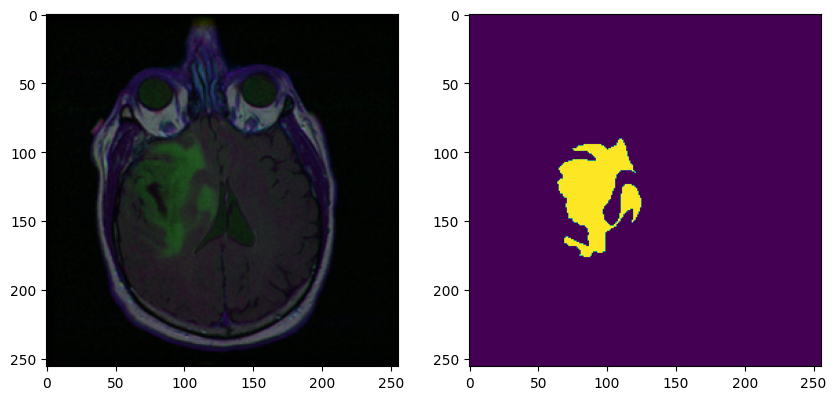

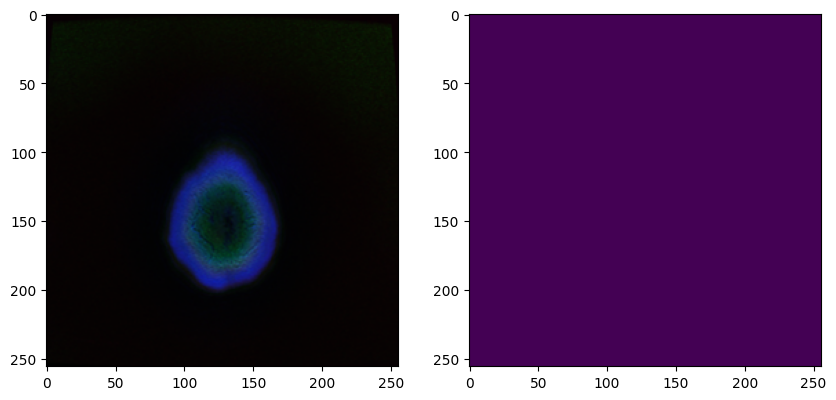

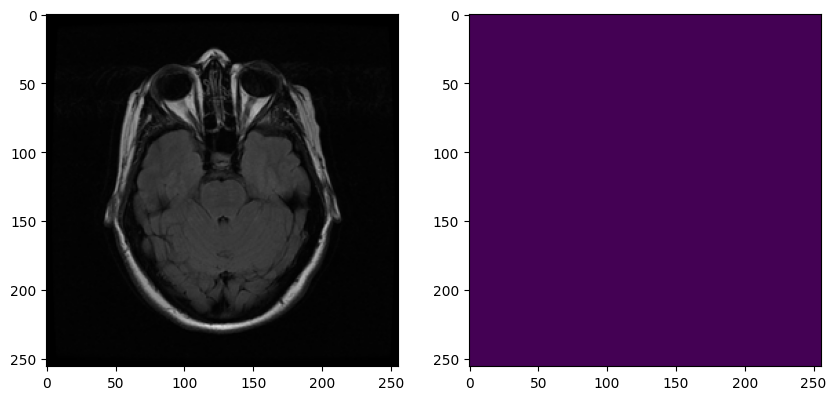

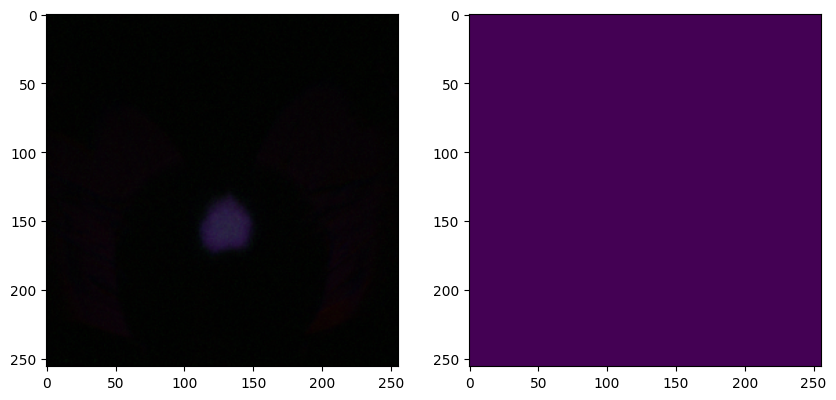

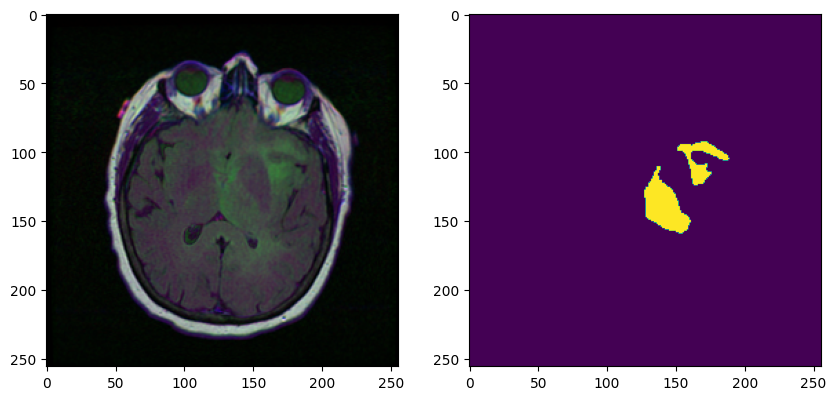

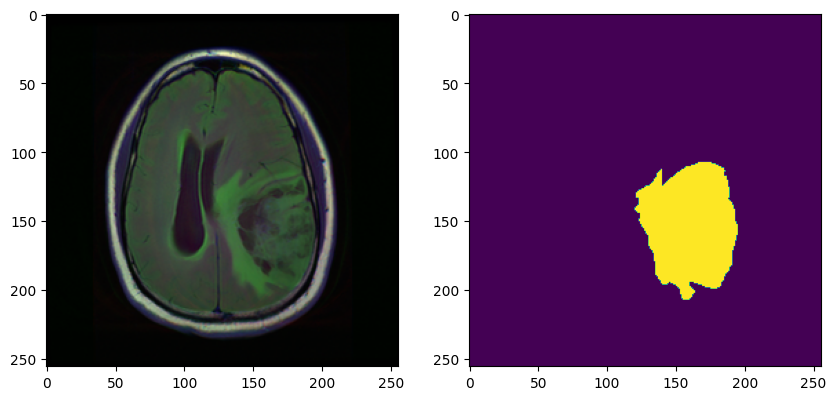

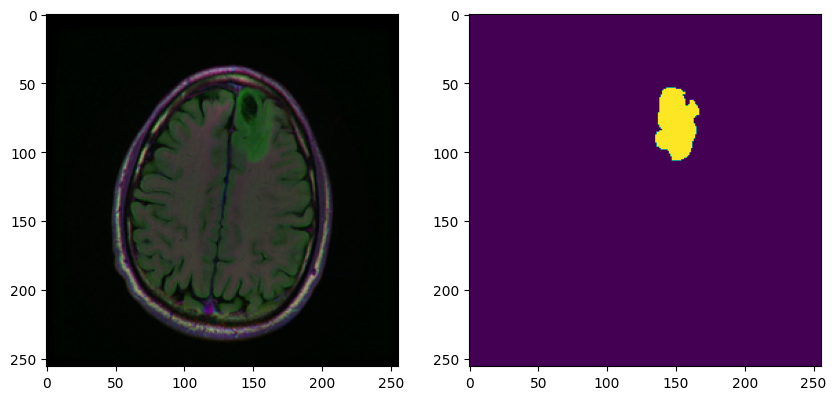

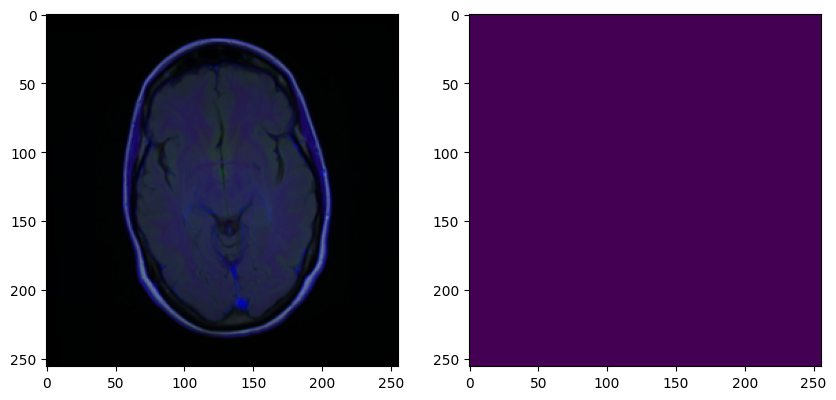

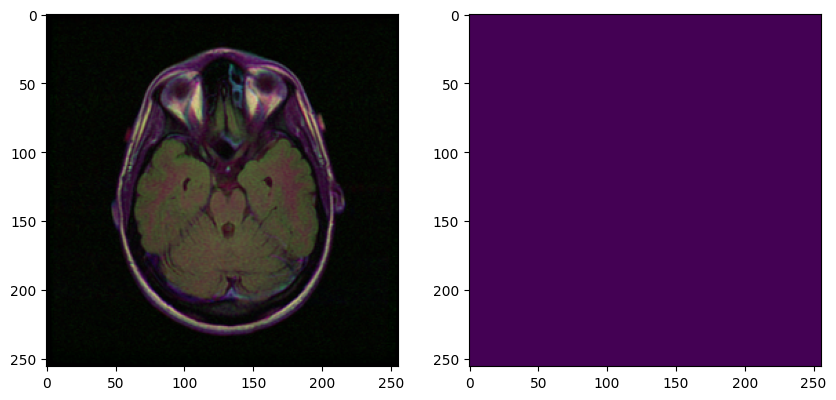

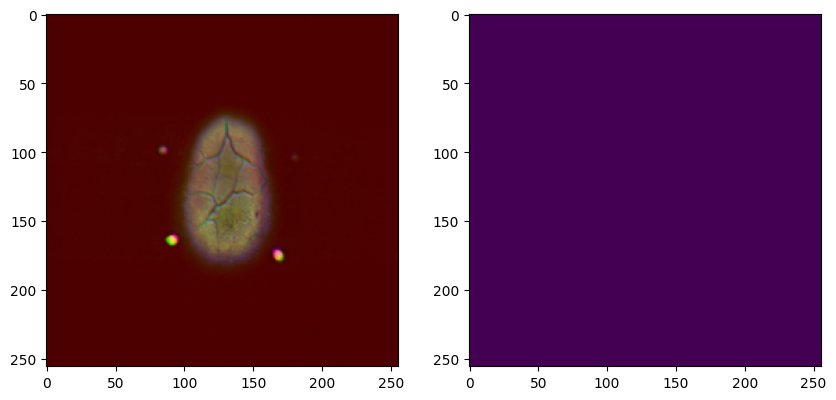

In [14]:
index = np.arange(train_df.shape[0])
rng = np.random.default_rng(37)
rng.shuffle(index)
for idx in range(10):
    image_path = train_df.iloc[index[idx]]['Image']
    mask_path = train_df.iloc[index[idx]]['Mask']
    image = Image.open(image_path).convert('RGB')
    mask = Image.open(mask_path).convert('L')
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(image)
    ax[1].imshow(mask)

### Training the Model

Encoder and Decoder model with BCELoss

In [15]:
import torch
import torch.nn as nn


class nnUNet2D(nn.Module):
    def __init__(self, in_channels, out_channels, base_channels=32):
        super(nnUNet2D, self).__init__()

        # Encoder
        self.encoder1 = self.conv_block(in_channels, base_channels)
        self.encoder2 = self.conv_block(base_channels, base_channels * 2)
        self.encoder3 = self.conv_block(base_channels * 2, base_channels * 4)
        self.encoder4 = self.conv_block(base_channels * 4, base_channels * 8)

        # Bottleneck
        self.bottleneck = self.conv_block(base_channels * 8, base_channels * 16)

        # Decoder
        self.upconv4 = self.upconv_block(base_channels * 16, base_channels * 8)
        self.decoder4 = self.conv_block(base_channels * 16, base_channels * 8)
        self.upconv3 = self.upconv_block(base_channels * 8, base_channels * 4)
        self.decoder3 = self.conv_block(base_channels * 8, base_channels * 4)
        self.upconv2 = self.upconv_block(base_channels * 4, base_channels * 2)
        self.decoder2 = self.conv_block(base_channels * 4, base_channels * 2)
        self.upconv1 = self.upconv_block(base_channels * 2, base_channels)
        self.decoder1 = self.conv_block(base_channels * 2, base_channels)

        # Auxiliary Outputs (Deep Supervision)
        self.aux_output3 = nn.Conv2d(base_channels * 8, out_channels, kernel_size=1)
        self.aux_output2 = nn.Conv2d(base_channels * 4, out_channels, kernel_size=1)

        # Final Output
        self.output_conv = nn.Conv2d(base_channels, out_channels, kernel_size=1)
        self.sigmoid = nn.Sigmoid()

    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.InstanceNorm2d(out_channels),  # Instance normalization
            nn.LeakyReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.InstanceNorm2d(out_channels),
            nn.LeakyReLU(inplace=True)
        )

    def upconv_block(self, in_channels, out_channels):
        return nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2)

    def forward(self, x):
        # Encoding path
        enc1 = self.encoder1(x)
        enc2 = self.encoder2(nn.MaxPool2d(2)(enc1))
        enc3 = self.encoder3(nn.MaxPool2d(2)(enc2))
        enc4 = self.encoder4(nn.MaxPool2d(2)(enc3))

        # Bottleneck
        bottleneck = self.bottleneck(nn.MaxPool2d(2)(enc4))

        # Decoding path
        dec4 = self.upconv4(bottleneck)
        dec4 = torch.cat((dec4, enc4), dim=1)
        dec4 = self.decoder4(dec4)

        dec3 = self.upconv3(dec4)
        dec3 = torch.cat((dec3, enc3), dim=1)
        aux3 = self.aux_output3(dec3)  # Auxiliary output 3
        dec3 = self.decoder3(dec3)

        dec2 = self.upconv2(dec3)
        dec2 = torch.cat((dec2, enc2), dim=1)
        aux2 = self.aux_output2(dec2)  # Auxiliary output 2
        dec2 = self.decoder2(dec2)

        dec1 = self.upconv1(dec2)
        dec1 = torch.cat((dec1, enc1), dim=1)
        dec1 = self.decoder1(dec1)

        # Final Output
        output = self.output_conv(dec1)
        output = self.sigmoid(output)

        return output, aux2, aux3


# Verify CUDA Devices
if torch.cuda.is_available():
    print(f"Number of available GPUs: {torch.cuda.device_count()}")
    for i in range(torch.cuda.device_count()):
        print(f"CUDA device {i}: {torch.cuda.get_device_name(i)}")

# Device Setup
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Initialize nnUNet Model
model = nnUNet2D(3, 1).to(device)  # 3-channel input (RGB) and 1-channel output (binary mask)





Number of available GPUs: 1
CUDA device 0: Tesla P100-PCIE-16GB


In [16]:
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
class SegmentationDataset(Dataset):
    def __init__(self, image_paths, mask_paths, transform=None):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx]).convert('RGB')
        mask = Image.open(self.mask_paths[idx]).convert('L')

        img = np.array(img)
        mask = np.array(mask)
        if self.transform:
            img = self.transform(img)
            mask = self.transform(mask)
        return img, mask


# Transform
transform = transforms.Compose([
    transforms.Lambda(lambda x: x/255.0),
    transforms.ToTensor()
])



  0%|          | 0/500 [00:00<?, ?it/s]

Epoch 1/500, Loss: 0.3227



  0%|          | 1/500 [00:45<6:16:10, 45.23s/it]

Dev Loss: 0.2492
Epoch 2/500, Loss: 0.2202



  0%|          | 2/500 [01:29<6:12:01, 44.82s/it]

Dev Loss: 0.1941
Epoch 3/500, Loss: 0.1728



  1%|          | 3/500 [02:14<6:09:57, 44.66s/it]

Dev Loss: 0.1541
Epoch 4/500, Loss: 0.1403



  1%|          | 4/500 [02:58<6:08:39, 44.60s/it]

Dev Loss: 0.1274
Epoch 5/500, Loss: 0.1161



  1%|          | 5/500 [03:43<6:07:54, 44.59s/it]

Dev Loss: 0.1061
Epoch 6/500, Loss: 0.0964



  1%|          | 6/500 [04:27<6:07:13, 44.60s/it]

Dev Loss: 0.0884
Epoch 7/500, Loss: 0.0818



  1%|▏         | 7/500 [05:12<6:06:05, 44.55s/it]

Dev Loss: 0.0758
Epoch 8/500, Loss: 0.0711



  2%|▏         | 8/500 [05:56<6:05:15, 44.54s/it]

Dev Loss: 0.0661
Epoch 9/500, Loss: 0.0615



  2%|▏         | 9/500 [06:41<6:04:44, 44.57s/it]

Dev Loss: 0.0593
Epoch 10/500, Loss: 0.0537



  2%|▏         | 10/500 [07:26<6:04:01, 44.58s/it]

Dev Loss: 0.0505
Epoch 11/500, Loss: 0.0477



  2%|▏         | 11/500 [08:10<6:03:07, 44.55s/it]

Dev Loss: 0.0452
Epoch 12/500, Loss: 0.0432



  2%|▏         | 12/500 [08:55<6:02:23, 44.56s/it]

Dev Loss: 0.0407
Epoch 13/500, Loss: 0.0378



  3%|▎         | 13/500 [09:39<6:01:58, 44.60s/it]

Dev Loss: 0.0358
Epoch 14/500, Loss: 0.0363



  3%|▎         | 14/500 [10:24<6:01:06, 44.58s/it]

Dev Loss: 0.0343
Epoch 15/500, Loss: 0.0311



  3%|▎         | 15/500 [11:09<6:00:19, 44.58s/it]

Dev Loss: 0.0298
Epoch 16/500, Loss: 0.0277



  3%|▎         | 16/500 [11:53<5:59:22, 44.55s/it]

Dev Loss: 0.0268
Epoch 17/500, Loss: 0.0252



  3%|▎         | 17/500 [12:37<5:58:27, 44.53s/it]

Dev Loss: 0.0248
Epoch 18/500, Loss: 0.0232



  4%|▎         | 18/500 [13:22<5:57:27, 44.50s/it]

Dev Loss: 0.0229
Epoch 19/500, Loss: 0.0213



  4%|▍         | 19/500 [14:06<5:56:40, 44.49s/it]

Dev Loss: 0.0213
Epoch 20/500, Loss: 0.0197



  4%|▍         | 20/500 [14:51<5:56:01, 44.50s/it]

Dev Loss: 0.0199
Epoch 21/500, Loss: 0.0185



  4%|▍         | 21/500 [15:35<5:55:01, 44.47s/it]

Dev Loss: 0.0187
Epoch 22/500, Loss: 0.0172



  4%|▍         | 22/500 [16:20<5:54:14, 44.46s/it]

Dev Loss: 0.0176
Epoch 23/500, Loss: 0.0162



  5%|▍         | 23/500 [17:04<5:52:56, 44.40s/it]

Dev Loss: 0.0167
Epoch 24/500, Loss: 0.0157



  5%|▍         | 24/500 [17:48<5:52:21, 44.41s/it]

Dev Loss: 0.0168
Epoch 25/500, Loss: 0.0148



  5%|▌         | 25/500 [18:33<5:51:42, 44.43s/it]

Dev Loss: 0.0148
Epoch 26/500, Loss: 0.0137



  5%|▌         | 26/500 [19:17<5:50:56, 44.42s/it]

Dev Loss: 0.0142
Epoch 27/500, Loss: 0.0130



  5%|▌         | 27/500 [20:02<5:50:08, 44.42s/it]

Dev Loss: 0.0133
Epoch 28/500, Loss: 0.0120



  6%|▌         | 28/500 [20:46<5:49:45, 44.46s/it]

Dev Loss: 0.0125
Epoch 29/500, Loss: 0.0114



  6%|▌         | 29/500 [21:31<5:48:49, 44.44s/it]

Dev Loss: 0.0121
Epoch 30/500, Loss: 0.0108



  6%|▌         | 30/500 [22:15<5:48:08, 44.44s/it]

Dev Loss: 0.0116
Epoch 31/500, Loss: 0.0103



  6%|▌         | 31/500 [23:00<5:47:35, 44.47s/it]

Dev Loss: 0.0117
Epoch 32/500, Loss: 0.0099



  6%|▋         | 32/500 [23:44<5:46:40, 44.45s/it]

Dev Loss: 0.0110
Epoch 33/500, Loss: 0.0093



  7%|▋         | 33/500 [24:29<5:46:02, 44.46s/it]

Dev Loss: 0.0104
Epoch 34/500, Loss: 0.0088



  7%|▋         | 34/500 [25:13<5:45:18, 44.46s/it]

Dev Loss: 0.0099
Epoch 35/500, Loss: 0.0084



  7%|▋         | 35/500 [25:57<5:44:33, 44.46s/it]

Dev Loss: 0.0098
Epoch 36/500, Loss: 0.0086



  7%|▋         | 36/500 [26:42<5:43:44, 44.45s/it]

Dev Loss: 0.0101
Epoch 37/500, Loss: 0.0079



  7%|▋         | 37/500 [27:26<5:42:49, 44.43s/it]

Dev Loss: 0.0090
Epoch 38/500, Loss: 0.0078



  8%|▊         | 38/500 [28:11<5:42:01, 44.42s/it]

Dev Loss: 0.0093
Epoch 39/500, Loss: 0.0071



  8%|▊         | 39/500 [28:55<5:41:06, 44.40s/it]

Dev Loss: 0.0090
Epoch 40/500, Loss: 0.0066



  8%|▊         | 40/500 [29:39<5:40:09, 44.37s/it]

Dev Loss: 0.0087
Epoch 41/500, Loss: 0.0064



  8%|▊         | 41/500 [30:23<5:38:56, 44.31s/it]

Dev Loss: 0.0086
Epoch 42/500, Loss: 0.0060



  8%|▊         | 42/500 [31:08<5:38:38, 44.36s/it]

Dev Loss: 0.0079
Epoch 43/500, Loss: 0.0058



  9%|▊         | 43/500 [31:52<5:38:13, 44.41s/it]

Dev Loss: 0.0078
Epoch 44/500, Loss: 0.0055



  9%|▉         | 44/500 [32:37<5:37:27, 44.40s/it]

Dev Loss: 0.0076
Epoch 45/500, Loss: 0.0053



  9%|▉         | 45/500 [33:21<5:36:42, 44.40s/it]

Dev Loss: 0.0079
Epoch 46/500, Loss: 0.0101



  9%|▉         | 46/500 [34:06<5:35:58, 44.40s/it]

Dev Loss: 0.0084
Epoch 47/500, Loss: 0.0070



  9%|▉         | 47/500 [34:50<5:35:05, 44.38s/it]

Dev Loss: 0.0077
Epoch 48/500, Loss: 0.0057



 10%|▉         | 48/500 [35:34<5:34:17, 44.37s/it]

Dev Loss: 0.0073
Epoch 49/500, Loss: 0.0050



 10%|▉         | 49/500 [36:19<5:33:20, 44.35s/it]

Dev Loss: 0.0080
Epoch 50/500, Loss: 0.0048



 10%|█         | 50/500 [37:03<5:33:04, 44.41s/it]

Dev Loss: 0.0074
Epoch 51/500, Loss: 0.0044



 10%|█         | 51/500 [37:48<5:32:20, 44.41s/it]

Dev Loss: 0.0071
Epoch 52/500, Loss: 0.0041



 10%|█         | 52/500 [38:32<5:31:46, 44.44s/it]

Dev Loss: 0.0073
Epoch 53/500, Loss: 0.0039



 11%|█         | 53/500 [39:16<5:30:42, 44.39s/it]

Dev Loss: 0.0072
Epoch 54/500, Loss: 0.0038



 11%|█         | 54/500 [40:01<5:30:15, 44.43s/it]

Dev Loss: 0.0075
Epoch 55/500, Loss: 0.0038



 11%|█         | 55/500 [40:45<5:29:30, 44.43s/it]

Dev Loss: 0.0071
Epoch 56/500, Loss: 0.0037



 11%|█         | 56/500 [41:30<5:28:44, 44.42s/it]

Dev Loss: 0.0068
Epoch 57/500, Loss: 0.0034



 11%|█▏        | 57/500 [42:14<5:27:48, 44.40s/it]

Dev Loss: 0.0071
Epoch 58/500, Loss: 0.0032



 12%|█▏        | 58/500 [42:58<5:27:02, 44.40s/it]

Dev Loss: 0.0073
Epoch 59/500, Loss: 0.0031



 12%|█▏        | 59/500 [43:43<5:26:11, 44.38s/it]

Dev Loss: 0.0072
Epoch 60/500, Loss: 0.0029



 12%|█▏        | 60/500 [44:27<5:25:30, 44.39s/it]

Dev Loss: 0.0073
Epoch 61/500, Loss: 0.0028



 12%|█▏        | 61/500 [45:12<5:24:34, 44.36s/it]

Dev Loss: 0.0074
Epoch 62/500, Loss: 0.0027



 12%|█▏        | 62/500 [45:56<5:23:42, 44.34s/it]

Dev Loss: 0.0075
Epoch 63/500, Loss: 0.0033



 13%|█▎        | 63/500 [46:40<5:23:08, 44.37s/it]

Dev Loss: 0.0074
Epoch 64/500, Loss: 0.0056



 13%|█▎        | 64/500 [47:24<5:22:09, 44.33s/it]

Dev Loss: 0.0072
Epoch 65/500, Loss: 0.0035



 13%|█▎        | 65/500 [48:09<5:21:26, 44.34s/it]

Dev Loss: 0.0068
Epoch 66/500, Loss: 0.0028



 13%|█▎        | 66/500 [48:53<5:20:37, 44.33s/it]

Dev Loss: 0.0068
Epoch 67/500, Loss: 0.0025



 13%|█▎        | 67/500 [49:37<5:19:54, 44.33s/it]

Dev Loss: 0.0070
Epoch 68/500, Loss: 0.0023



 14%|█▎        | 68/500 [50:22<5:19:10, 44.33s/it]

Dev Loss: 0.0073
Epoch 69/500, Loss: 0.0022



 14%|█▍        | 69/500 [51:06<5:18:39, 44.36s/it]

Dev Loss: 0.0073
Epoch 70/500, Loss: 0.0021



 14%|█▍        | 70/500 [51:51<5:18:08, 44.39s/it]

Dev Loss: 0.0075
Epoch 71/500, Loss: 0.0020



 14%|█▍        | 70/500 [52:35<5:23:03, 45.08s/it]


Dev Loss: 0.0075
Early stopping after 71 epochs.


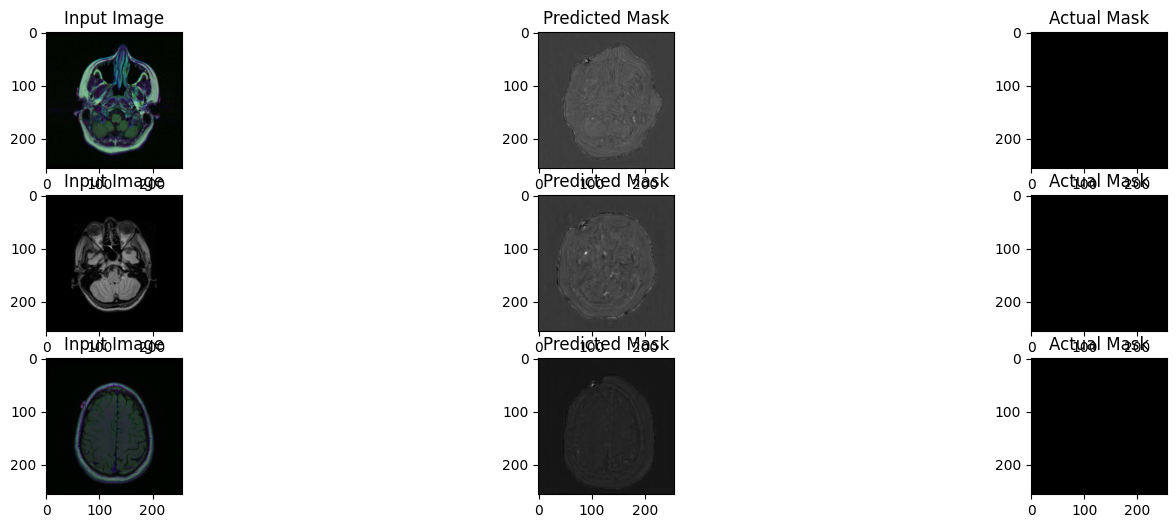

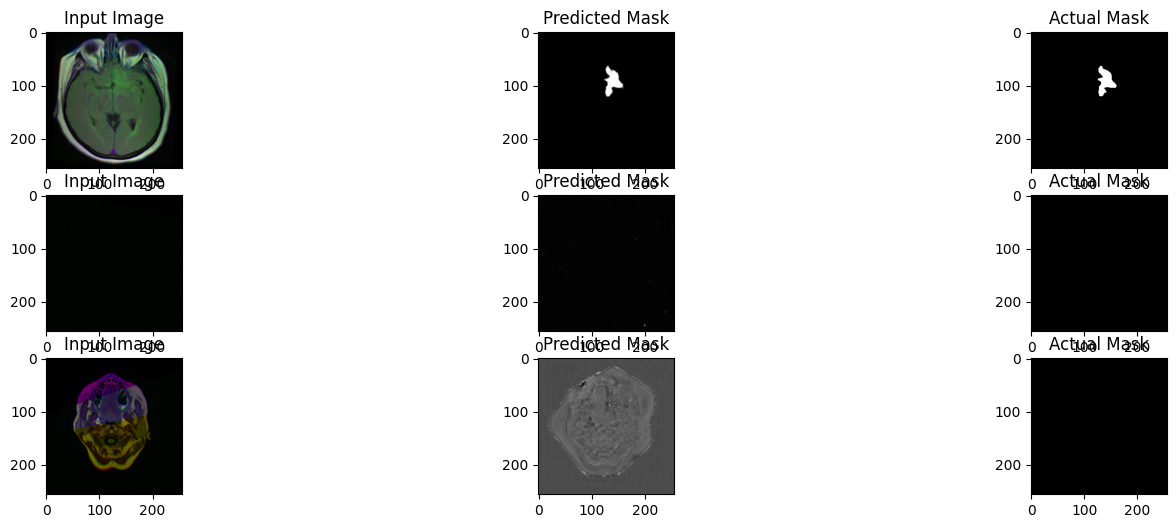

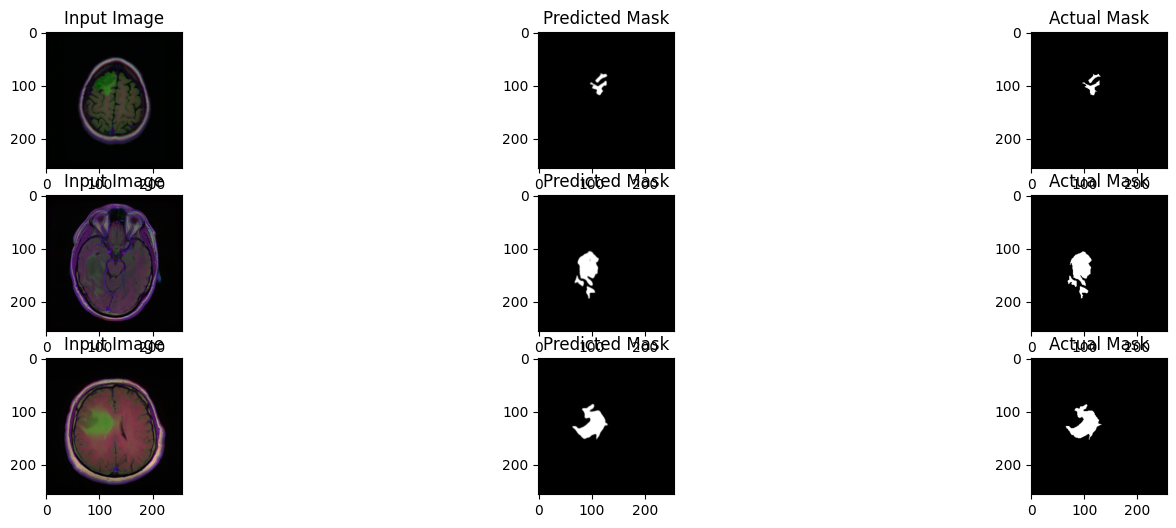

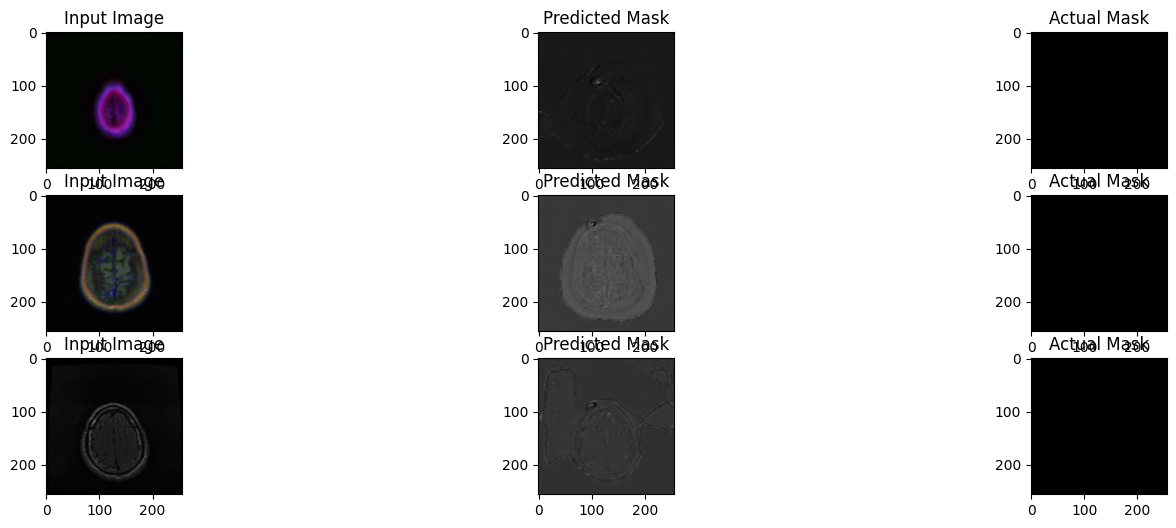

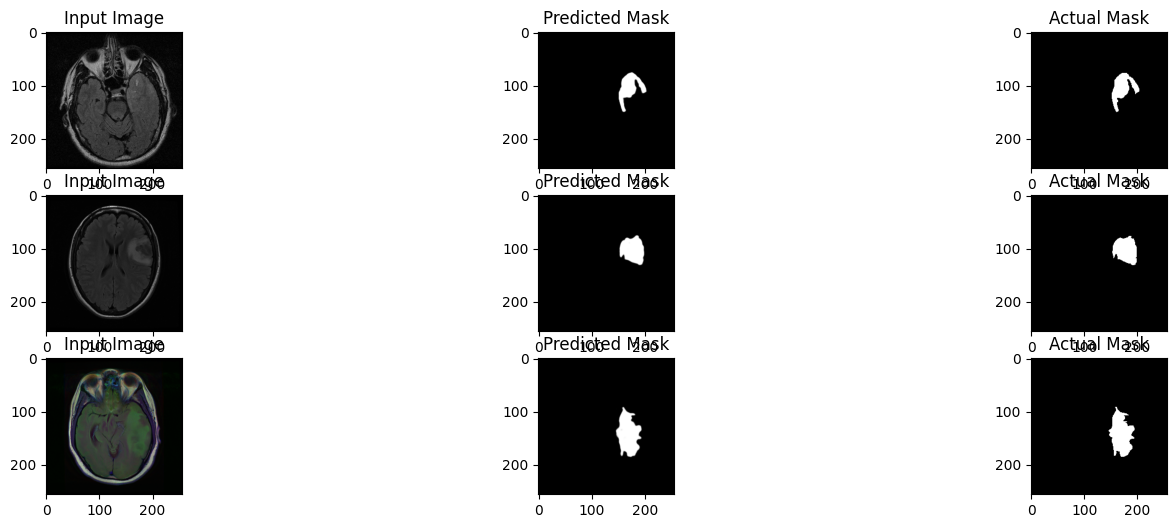

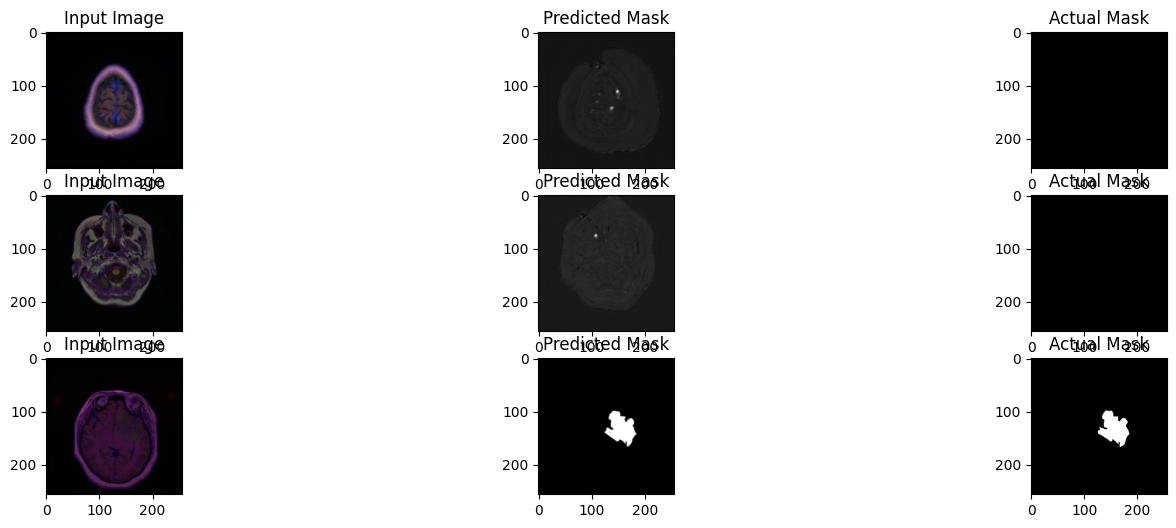

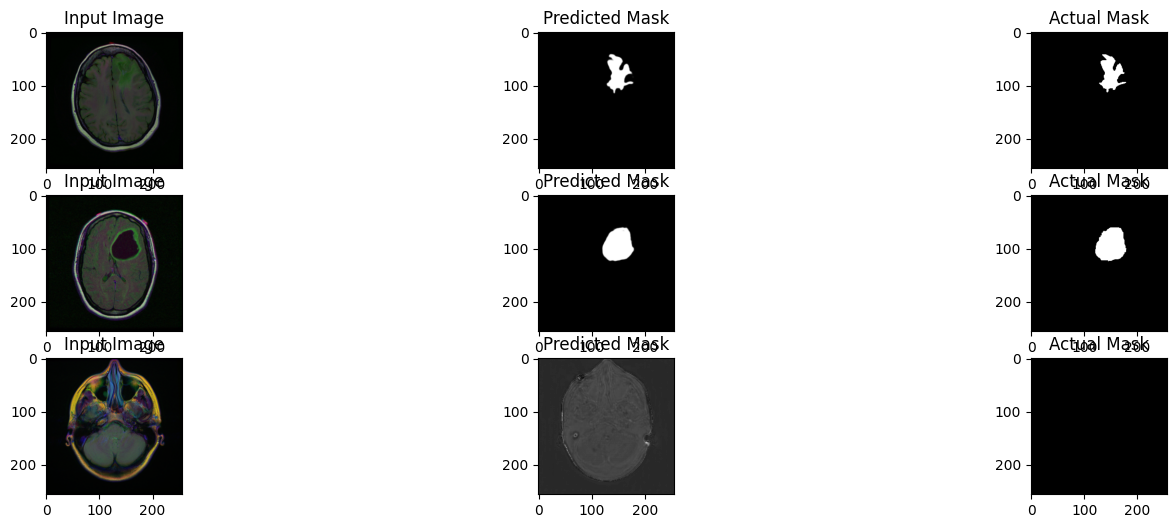

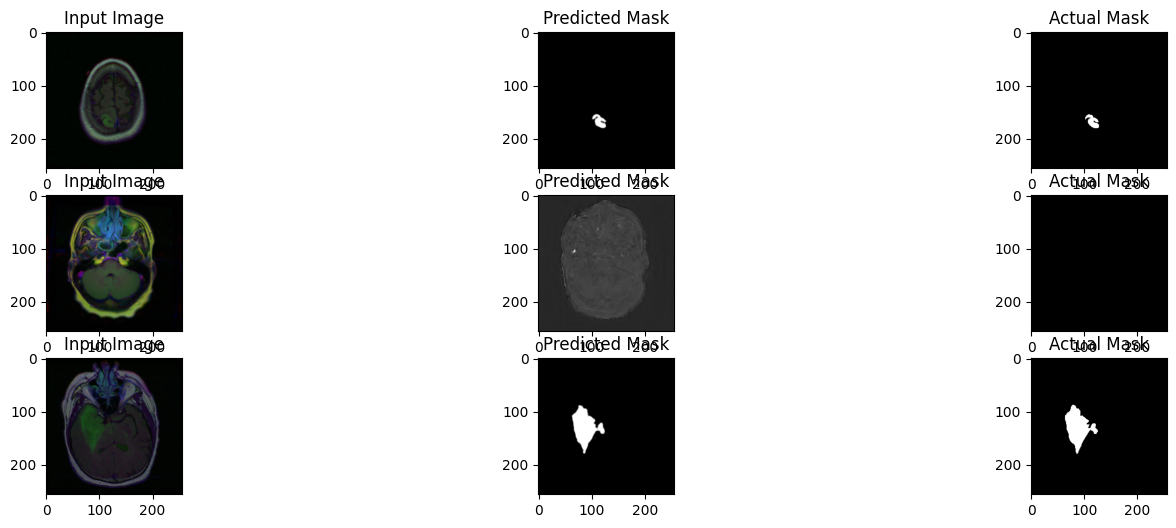

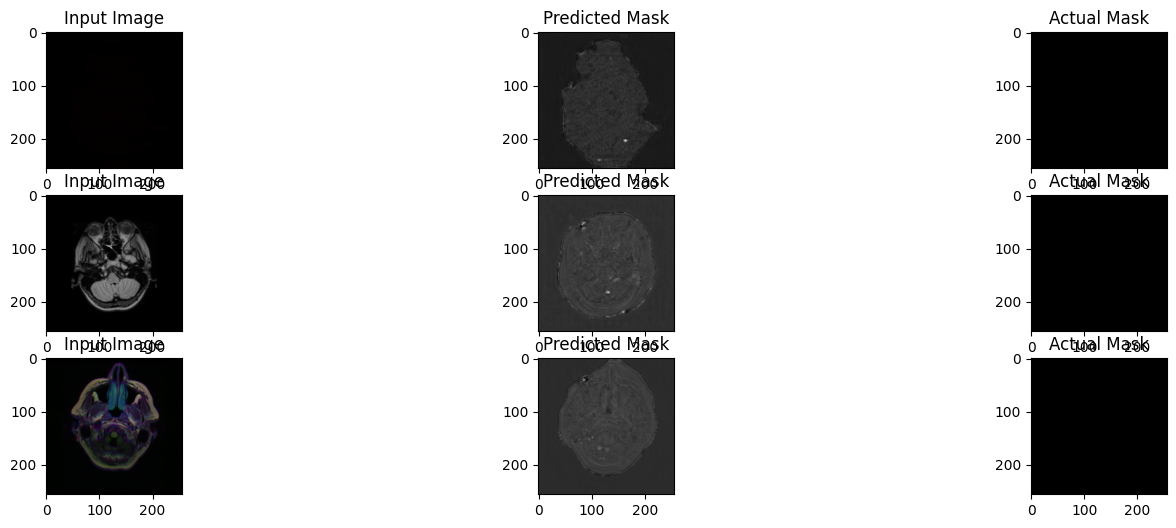

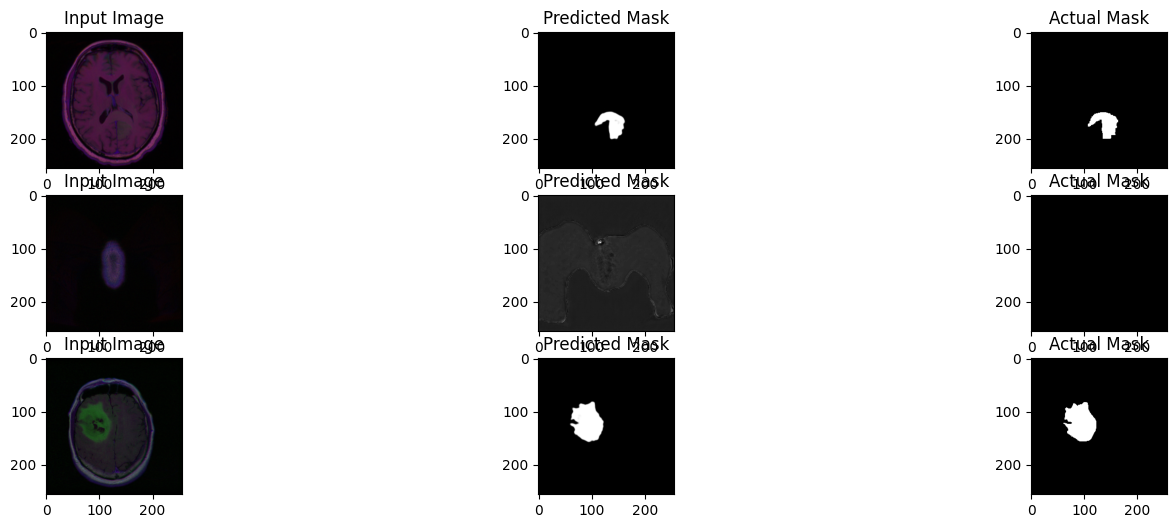

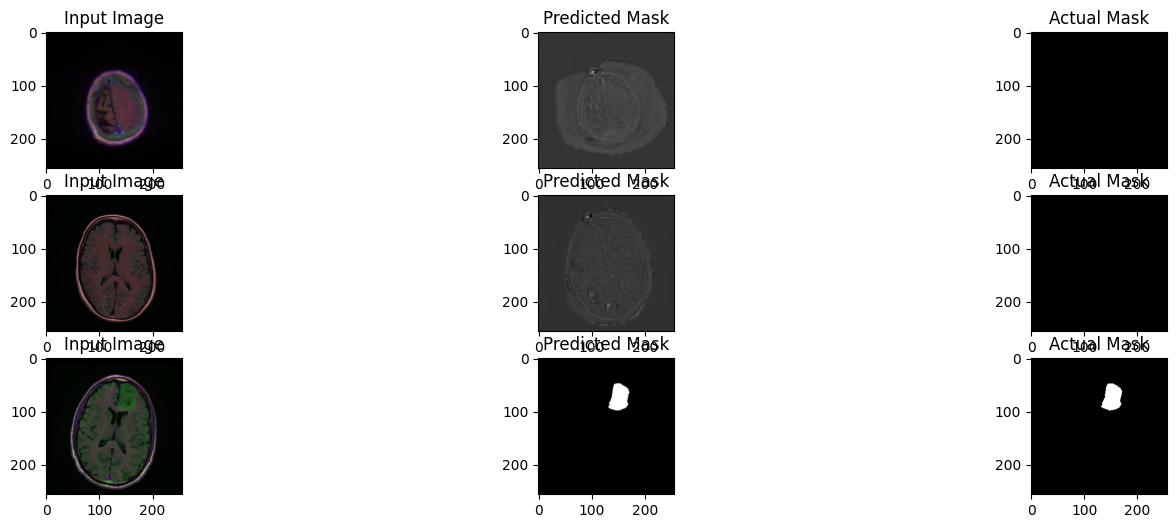

In [17]:
from tqdm import tqdm
import torch.optim as optim
import numpy as np


# Loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=3e-4)

# Training loop
def train(model, dataloader, dev_dataloader, criterion, optimizer, num_epochs=10, patience=15):
    model.train()
    best_dev_loss = np.inf
    early_stopping_counter = 0
    for epoch in tqdm(range(num_epochs)):
        running_loss = 0.0
        for images, masks in dataloader:
            # Move tensors to the appropriate device
            images = images.float().to(device)
            masks = masks.float().to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs, _, _ = model(images)  # Extract only the primary output
            loss = criterion(outputs, masks)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

        epoch_loss = running_loss / len(dataloader.dataset)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

        # Evaluate on the validation dataset
        model.eval()
        dev_loss = 0.0
        with torch.no_grad():
            for images, masks in tqdm(dev_dataloader, desc='Evaluating on dev set', unit='batch'):
                images = images.float().to(device)
                masks = masks.float().to(device)

                outputs, _, _ = model(images)  # Extract only the primary output
                loss = criterion(outputs, masks)
                dev_loss += loss.item() * images.size(0)

        dev_loss = dev_loss / len(dev_dataloader.dataset)
        print(f'Dev Loss: {dev_loss:.4f}')
        
        # Save model checkpoints every 10 epochs
        if (epoch + 1) % 10 == 0:
            torch.save(model.state_dict(), f'model_{epoch+1}.pth')

        # Early stopping based on validation loss
        if dev_loss < best_dev_loss:
            best_dev_loss = dev_loss
            early_stopping_counter = 0
        else:
            early_stopping_counter += 1
            if early_stopping_counter >= patience:
                print(f'Early stopping after {epoch + 1} epochs.')
                torch.save(model.state_dict(), 'final_model.pth')
                break

def evaluate(model, dataloader):
    model.eval()
    with torch.no_grad():
        counter = 0
        for images, masks in dataloader:
            if counter > 10:
                break
            counter += 1
            # Move tensors to the appropriate device
            images = images.float().to(device)
            masks = masks.float().to(device)

            # Forward pass
            outputs, _, _ = model(images)  # Extract only the primary output

            # Plot the results for visualization
            plt.figure(figsize=(18, 6))
            for i in range(min(len(images), 3)):
                plt.subplot(3, 3, i*3 + 1)
                plt.imshow(images[i].cpu().numpy().transpose(1, 2, 0))
                plt.title('Input Image')

                plt.subplot(3, 3, i*3 + 2)
                plt.imshow(outputs[i].cpu().numpy().squeeze(), cmap='gray')
                plt.title('Predicted Mask')

                plt.subplot(3, 3, i*3 + 3)
                plt.imshow(masks[i].cpu().numpy().squeeze(), cmap='gray')
                plt.title('Actual Mask')

            plt.show()


# Paths and Datasets
image_paths = train_df['Image'].values.tolist()
mask_paths = train_df['Mask'].values.tolist()

dev_paths = val_df['Image'].values.tolist()
dev_mask_paths = val_df['Mask'].values.tolist()

dataset = SegmentationDataset(image_paths, mask_paths, transform=transform)
dev_dataset = SegmentationDataset(dev_paths, dev_mask_paths, transform=transform)

dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
dev_dataloader = DataLoader(dev_dataset, batch_size=32, shuffle=False)

# Training
train(model, dataloader, dev_dataloader, criterion, optimizer, num_epochs=500)

# Evaluation
evaluate(model, dataloader)



### Evaluating the performance

This section evaluates our model's segmentation performance using two common metrics: Intersection over Union (IoU) and Dice coefficient (Dice). Both metrics quantify the overlap between predicted and ground truth segmentation masks.

IoU focuses on the ratio of correctly classified pixels, while Dice emphasizes the balance between true positives and both false positives and negatives. We'll calculate these scores to assess the model's segmentation accuracy.

In [18]:
import torch

def iou_score(y_true, y_pred, smooth=1e-6):
    intersection = torch.sum(y_true * y_pred)
    union = torch.sum(y_true) + torch.sum(y_pred) - intersection
    iou = (intersection + smooth) / (union + smooth)
    
    return iou

def dice_score(y_true, y_pred, smooth=1e-6):
    intersection = torch.sum(y_true * y_pred)
    dice = (2. * intersection + smooth) / (torch.sum(y_true) + torch.sum(y_pred) + smooth)
    #print(dice)
    return dice


In [21]:
def eval_model(model, test_loader, device):
    model.eval()
    ious = []
    dices = []

    with torch.no_grad():
        for images, masks in test_loader:
            images = images.float().to(device)
            masks = masks.float().to(device)
            
            # Extract only the primary output
            outputs, _, _ = model(images)
            
            # Apply thresholding to the primary output
            outputs[outputs < 0.5] = 0
            outputs[outputs >= 0.5] = 1

            # Compute IoU and Dice scores
            iou_score_val = iou_score(outputs, masks)
            dice_score_val = dice_score(outputs, masks)

            ious.append(iou_score_val)
            dices.append(dice_score_val)

    mean_iou = sum(ious) / len(ious)
    mean_dice = sum(dices) / len(dices)

    return mean_iou, mean_dice


In [22]:
test_dataset = SegmentationDataset(test_df[test_df['Diagnosis'] == 1]['Image'].values.tolist(), test_df[test_df['Diagnosis'] == 1]['Mask'].values.tolist(), transform=transform)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)
eval_model(model, test_dataloader, device)

(tensor(0.8451, device='cuda:0'), tensor(0.9160, device='cuda:0'))

In [23]:
torch.save(model.state_dict(), 'baseline_ckpt.pth')

In [24]:
model.load_state_dict(torch.load('baseline_ckpt.pth'))

<ipython-input-24-416895099476>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('baseline_ckpt.pth'))


<All keys matched successfully>